In [89]:
from pathlib import Path
import numpy as np
# cfg should save and preset the proper criteria.
from cfg import (winSize, zeroZone, criteria, pattern_size)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
cfg.criteria

(3, 30, 0.001)

In [91]:
def findCorners(image, pattern_size, winSize, zeroZone, criteria):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found, corners = cv2.findChessboardCorners(gray, pattern_size)
    
    if found:
        return(cv2.cornerSubPix(gray, corners, winSize, zeroZone, criteria))
    else:
        raise Exception("CornersNotFound")

In [92]:
image_path = '/home/jsk/GitHub/cv2stuff/data/images/left01.jpg'
# image_path = '/home/jsk/GitHub/cv2stuff/data/images/left.jpg'

In [93]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [94]:
# plt.imshow(image_rgb)

In [95]:
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
found = False
found, corners = cv2.findChessboardCorners(gray, pattern_size)
# print(found, corners)

In [96]:
if found:
    corners_new = cv2.cornerSubPix(gray, corners, winSize, zeroZone, criteria)
else:
    raise Exception("CornersNotFound")

In [97]:
corners.shape == corners_new.shape

True

In [98]:
np.array_equal(corners, corners_new)

True

In [101]:
corners = findCorners(image_rgb, pattern_size, winSize, zeroZone, criteria)

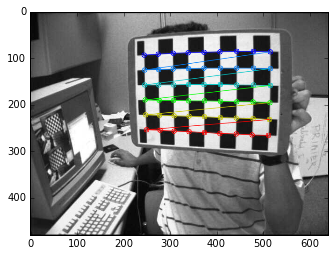

In [102]:
cv2.drawChessboardCorners(image_rgb, pattern_size, corners, found)
plt.imshow(image_rgb)

In [105]:
width, height = gray.shape[::-1]
width, height

(640, 480)

In [107]:
height, width = image_rgb.shape[:2]
height, width

(480, 640)